In [2]:
from headers import *

In [3]:
cd ../..

/home/tanmay/Research/Code/ActionPrimitives


In [4]:
number_trajectories = 20
dpos = npy.zeros((20,1000,2))
dvel = npy.zeros((20,1000,2))
dacc = npy.zeros((20,1000,2))
dforce = npy.zeros((20,1000,2))
pos = npy.zeros((20,1000,2))
vel = npy.zeros((20,1000,2))
acc = npy.zeros((20,1000,2))
force = npy.zeros((20,1000,2))

for i in range(20):
    dpos[i] = npy.load("Data/Mouse_Data_New/Trajectory_Rollouts/roll_pos_{0}.npy".format(i))    
    dvel[i] = npy.load("Data/Mouse_Data_New/Trajectory_Rollouts/roll_vel_{0}.npy".format(i))
    dacc[i] = npy.load("Data/Mouse_Data_New/Trajectory_Rollouts/roll_acc_{0}.npy".format(i))
    dforce[i] = npy.load("Data/Mouse_Data_New/Trajectory_Rollouts/roll_force_{0}.npy".format(i))
    pos[i] = npy.load("Data/Mouse_Data_New/Traj_{0}/pos_{0}.npy".format(i))  
    vel[i] = npy.load("Data/Mouse_Data_New/Traj_{0}/vel_{0}.npy".format(i))  
    acc[i] = npy.load("Data/Mouse_Data_New/Traj_{0}/acc_{0}.npy".format(i))  
    force[i] = npy.load("Data/Mouse_Data_New/Trajectory_Rollouts/target_force_{0}.npy".format(i))  


In [5]:
i=0

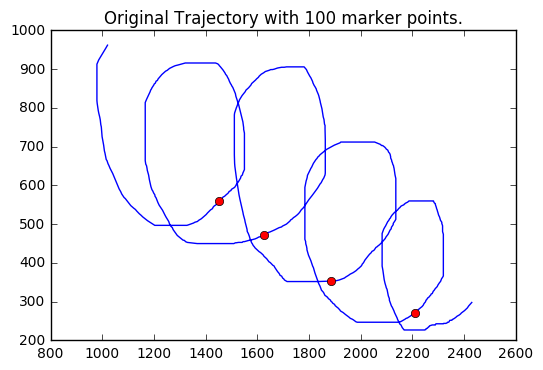

In [6]:
pt = npy.linspace(0,1000,11).astype(int)
pt[10]-=10
index = [272,505,707,909]
plt.plot(pos[i,:,0],pos[i,:,1],'b')
# plt.plot(pos[i,pt,0],pos[i,pt,1],'or')
plt.plot(pos[i,index,0],pos[i,index,1],'or')
plt.title("Original Trajectory with 100 marker points.")
plt.show()

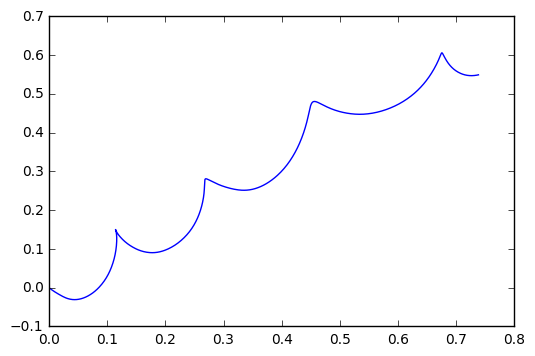

In [7]:
plt.plot(dpos[i,:,0],dpos[i,:,1])
plt.show()

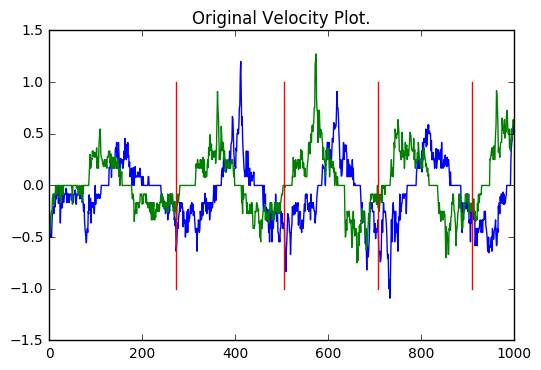

In [8]:
plt.plot(range(1000),vel[i])
plt.title("Original Velocity Plot.")
a = 1
plt.plot([272,272],[-a,a],'r')
plt.plot([505,505],[-a,a],'r')
plt.plot([707,707],[-a,a],'r')
plt.plot([909,909],[-a,a],'r')
plt.show()

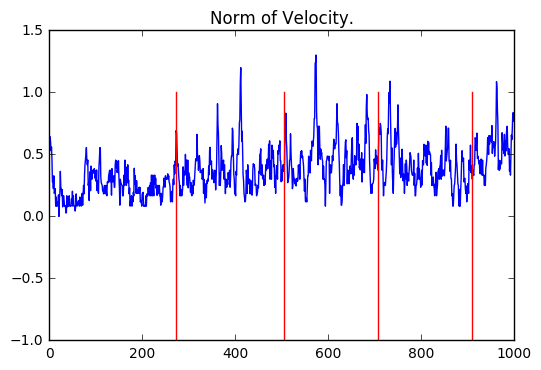

In [9]:
vn = npy.linalg.norm(vel[i],axis=1)
plt.plot(range(1000),vn)
plt.title("Norm of Velocity.")
a = 1
plt.plot([272,272],[-a,a],'r')
plt.plot([505,505],[-a,a],'r')
plt.plot([707,707],[-a,a],'r')
plt.plot([909,909],[-a,a],'r')
plt.show()

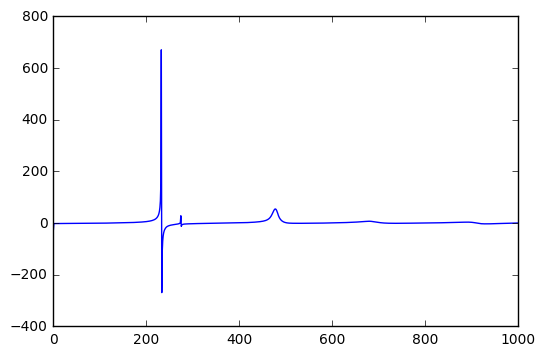

232

In [10]:
# Dy/Dx = (Dy/Dt) * (Dt/Dx)
# Dy/Dx = (Dy/Dt) / (Dx/Dt)
ratio = dvel[i,:,1]/dvel[i,:,0]
plt.plot(range(1000),ratio)
plt.show()
npy.argmax(ratio)

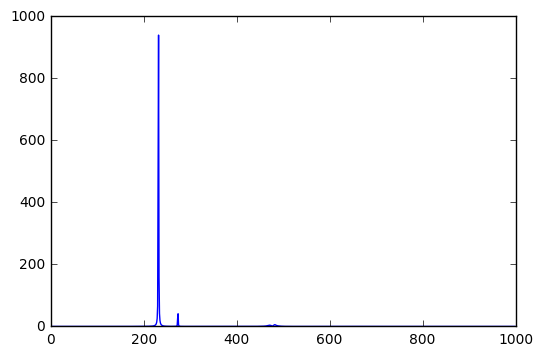

In [11]:
dr = abs(npy.diff(ratio))
plt.plot(range(999),dr)
plt.show()

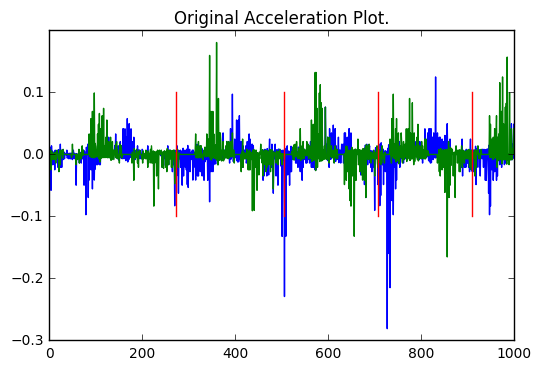

In [12]:
plt.plot(range(1000),acc[i])
plt.title("Original Acceleration Plot.")
a = 0.1
plt.plot([272,272],[-a,a],'r')
plt.plot([505,505],[-a,a],'r')
plt.plot([707,707],[-a,a],'r')
plt.plot([909,909],[-a,a],'r')
plt.show()

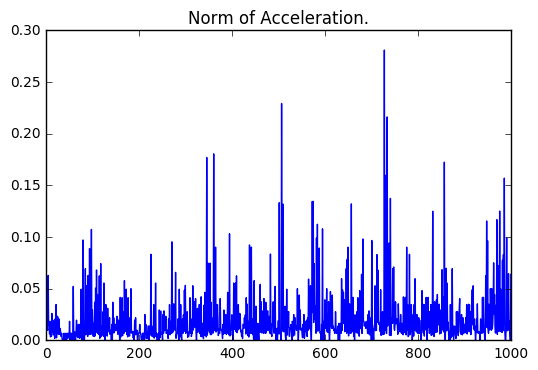

727

In [13]:
an = npy.linalg.norm(acc[i],axis=1)
plt.plot(range(1000),an)
plt.title("Norm of Acceleration.")
plt.show()
a = 0.1
plt.plot([272,272],[-a,a],'r')
plt.plot([505,505],[-a,a],'r')
plt.plot([707,707],[-a,a],'r')
plt.plot([909,909],[-a,a],'r')

ind = npy.argmax(an)
ind

In [14]:
fd = npy.diff(force[i],axis=0)
# plt.plot(range(999),fd)
# plt.title("Diffing Forces.")
# plt.show()

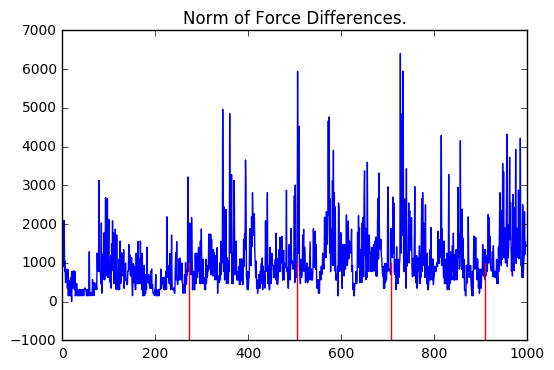

In [15]:
fd = npy.diff(force[i],axis=0)
nfd = npy.linalg.norm(fd,axis=1)
dfn = npy.diff(npy.linalg.norm(force[i],axis=1),axis=0)
plt.plot(range(999),nfd)
plt.title("Norm of Force Differences.")
a = 1000
plt.plot([272,272],[-a,a],'r')
plt.plot([505,505],[-a,a],'r')
plt.plot([707,707],[-a,a],'r')
plt.plot([909,909],[-a,a],'r')
plt.show()

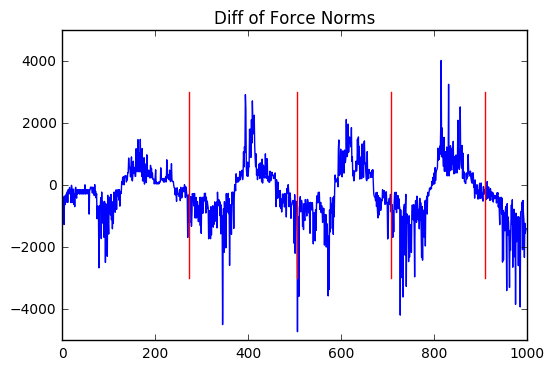

In [16]:
dfn = npy.diff(npy.linalg.norm(force[i],axis=1),axis=0)
plt.plot(range(999),dfn)
plt.title("Diff of Force Norms")
a = 3000
plt.plot([272,272],[-a,a],'r')
plt.plot([505,505],[-a,a],'r')
plt.plot([707,707],[-a,a],'r')
plt.plot([909,909],[-a,a],'r')
plt.show()

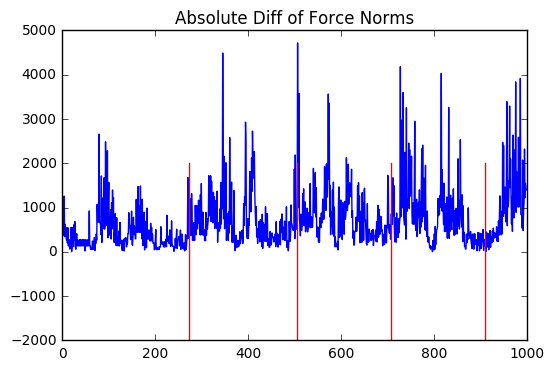

In [17]:
plt.plot(range(999),abs(dfn))
plt.title("Absolute Diff of Force Norms")
a = 2000
plt.plot([272,272],[-a,a],'r')
plt.plot([505,505],[-a,a],'r')
plt.plot([707,707],[-a,a],'r')
plt.plot([909,909],[-a,a],'r')
plt.show()
# npy.argmax(abs(dfn[0:500]))

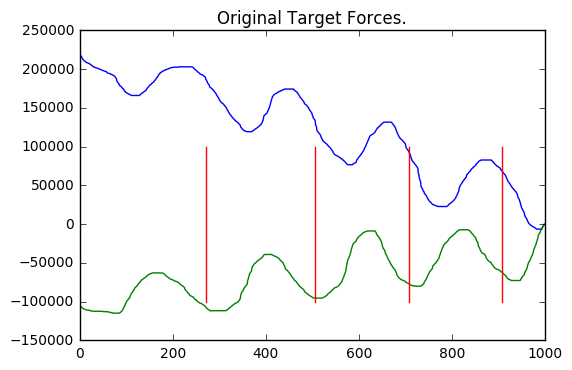

In [18]:
plt.plot(range(1000),force[i])
plt.title("Original Target Forces.")
a = 100000
plt.plot([272,272],[-a,a],'r')
plt.plot([505,505],[-a,a],'r')
plt.plot([707,707],[-a,a],'r')
plt.plot([909,909],[-a,a],'r')
plt.show()

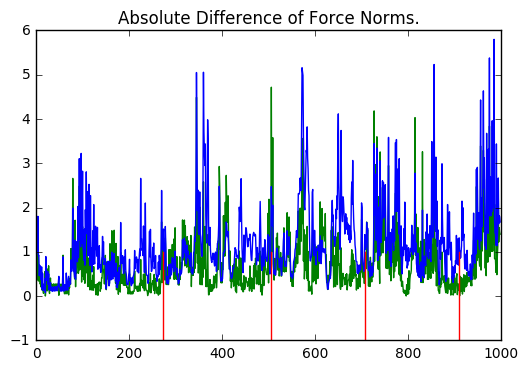

In [19]:
diff_df = npy.diff(dforce[i],axis=0)
norm_diff_df = npy.linalg.norm(diff_df,axis=1)

dmp_dfn = npy.diff(npy.linalg.norm(force[i],axis=1),axis=0)
plt.plot(range(999),abs(dmp_dfn)/1000,'g')
plt.plot(range(999),norm_diff_df,'b')
# plt.title("Norm of Force Differences.")
a = 1
plt.plot([272,272],[-a,a],'r')
plt.plot([505,505],[-a,a],'r')
plt.plot([707,707],[-a,a],'r')
plt.plot([909,909],[-a,a],'r')
plt.title("Absolute Difference of Force Norms.")
plt.show()

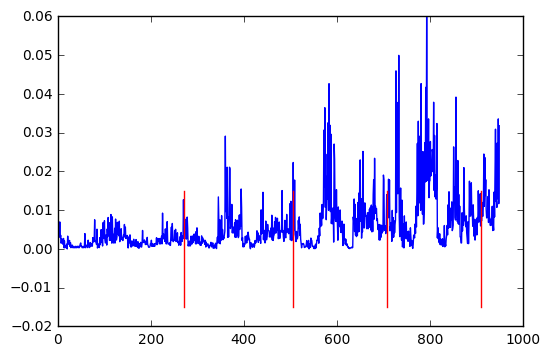

In [20]:
magnorm_force = copy.deepcopy(force[i])
x = npy.linalg.norm(magnorm_force,axis=1)
magnorm_force[:,0] /= x
magnorm_force[:,1] /= x

diff_magnorm = npy.diff(magnorm_force,axis=0)
norm_diff_magnorm = npy.linalg.norm(diff_magnorm,axis=1) 
plt.plot(range(950),norm_diff_magnorm[0:950])
a = 0.015
plt.plot([272,272],[-a,a],'r')
plt.plot([505,505],[-a,a],'r')
plt.plot([707,707],[-a,a],'r')
plt.plot([909,909],[-a,a],'r')
plt.show()

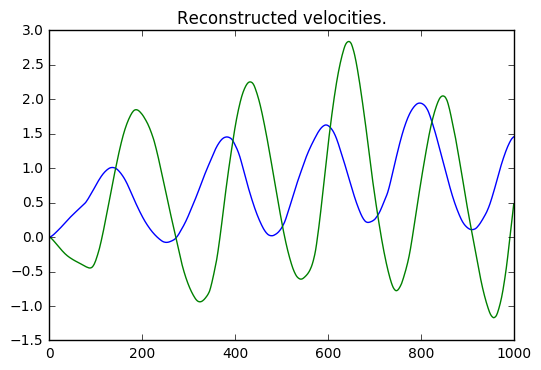

In [21]:
plt.plot(range(1000),dvel[i])
plt.title("Reconstructed velocities.")
plt.show()

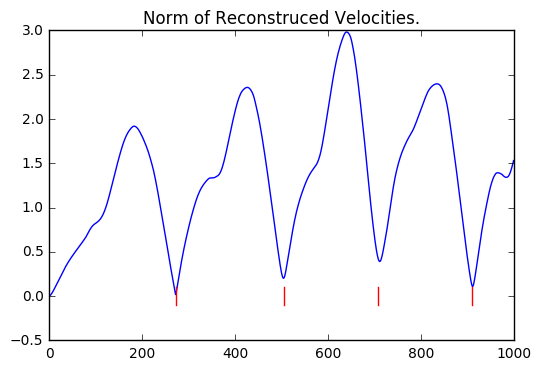

In [26]:
diff_dvel = npy.diff(dvel[i],axis=0)
norm_diff_dvel = npy.linalg.norm(diff_dvel,axis=1)
norm_dvel = npy.linalg.norm(dvel[i],axis=1)
# plt.plot(range(999),norm_diff_dvel)
plt.plot(range(1000),norm_dvel)
plt.title("Norm of Reconstruced Velocities.")
a = 0.1
plt.plot([272,272],[-a,a],'r')
plt.plot([505,505],[-a,a],'r')
plt.plot([707,707],[-a,a],'r')
plt.plot([909,909],[-a,a],'r')
plt.show()

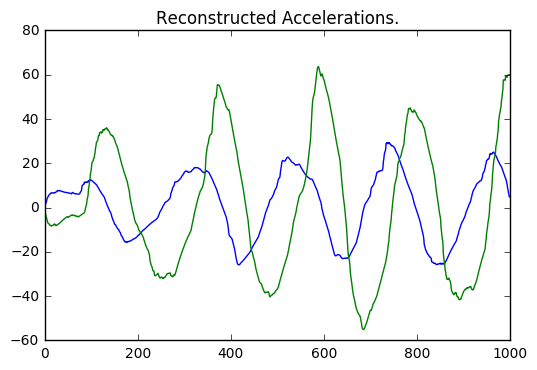

In [23]:
plt.plot(range(1000),dacc[i])
plt.title("Reconstructed Accelerations.")
plt.show()


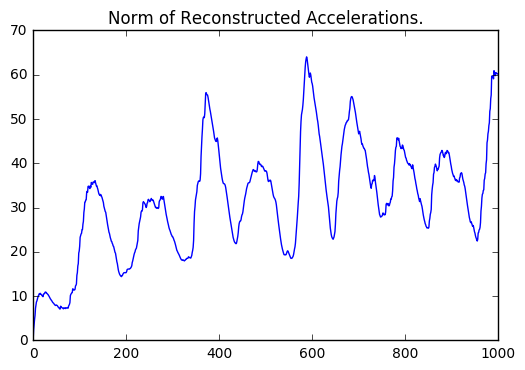

In [24]:
norm_acc = npy.linalg.norm(dacc[i],axis=1)
plt.plot(range(1000),norm_acc)
plt.title("Norm of Reconstructed Accelerations.")
plt.show()

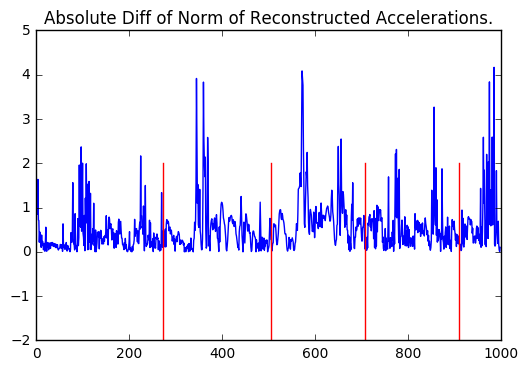

In [25]:
diff_norm_acc = npy.diff(norm_acc)
plt.plot(range(999),abs(diff_norm_acc))
plt.title("Absolute Diff of Norm of Reconstructed Accelerations.")
a = 2
plt.plot([272,272],[-a,a],'r')
plt.plot([505,505],[-a,a],'r')
plt.plot([707,707],[-a,a],'r')
plt.plot([909,909],[-a,a],'r')
plt.show()